# Capstone Project_CAP_1

Author: Gowtham Iyer

Dataset: https://www.kaggle.com/datasets/gauravtopre/bank-customer-churn-dataset

In [2]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib

## Loading the dataset

In [3]:
# Importing the dataset
dataset = pd.read_csv('/content/Bank Customer Churn Prediction.csv')

In [4]:
print(dataset.shape)

(10000, 12)


In [5]:
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB
None


##Understanding the data

In [6]:
print(dataset.head())
print(dataset.describe())
print(dataset.info())

   customer_id  credit_score country  gender  age  tenure    balance  \
0     15634602           619  France  Female   42       2       0.00   
1     15647311           608   Spain  Female   41       1   83807.86   
2     15619304           502  France  Female   42       8  159660.80   
3     15701354           699  France  Female   39       1       0.00   
4     15737888           850   Spain  Female   43       2  125510.82   

   products_number  credit_card  active_member  estimated_salary  churn  
0                1            1              1         101348.88      1  
1                1            0              1         112542.58      0  
2                3            1              0         113931.57      1  
3                2            0              0          93826.63      0  
4                1            1              1          79084.10      0  
        customer_id  credit_score           age        tenure        balance  \
count  1.000000e+04  10000.000000  10000.00

## Enumerating features

In [8]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()

gender = dataset['gender']
gender_le = le.fit_transform(gender)
dataset['gender'] = gender_le

country = dataset['country']
country_le = le.fit_transform(country)
dataset['country'] = country_le

## Segregating independent variables (features) and the dependent variable (class variable) in the dataset

In [9]:
X = dataset.drop(columns='churn')
print(X.head(), '\n')

y = dataset['churn']
print(y.head())

   customer_id  credit_score  country  gender  age  tenure    balance  \
0     15634602           619        0       0   42       2       0.00   
1     15647311           608        2       0   41       1   83807.86   
2     15619304           502        0       0   42       8  159660.80   
3     15701354           699        0       0   39       1       0.00   
4     15737888           850        2       0   43       2  125510.82   

   products_number  credit_card  active_member  estimated_salary  
0                1            1              1         101348.88  
1                1            0              1         112542.58  
2                3            1              0         113931.57  
3                2            0              0          93826.63  
4                1            1              1          79084.10   

0    1
1    0
2    1
3    0
4    0
Name: churn, dtype: int64


## Understanding the dataset by plotting two features against their churn probability

In [ ]:
import seaborn as sns
# Visualising the relationship between Customer Monthly Charges and Churn probability
sns.swarmplot(x="churn", y="credit_score", data=dataset)
plt.show()

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x7855ebe88280> (for post_execute):


KeyboardInterrupt: 

In [ ]:
# Visualising the relationship between Customer Gender and Churn probability
sns.swarmplot(x="churn", y="estimated_salary", data=dataset)
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 98.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 94.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


KeyboardInterrupt: 

## Splitting data for Training and Testing


In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(7000, 11)
(7000,)
(3000, 11)
(3000,)


## Creating Logistic Regression model and Training it

In [15]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

## Evaluating the performance of Logistic Regression mode



In [20]:
from sklearn.metrics import classification_report

y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

report = classification_report(y_test, y_pred, labels=np.unique(y_pred))
print(report)

Accuracy of logistic regression classifier on test set: 0.79
              precision    recall  f1-score   support

           0       0.79      1.00      0.88      2379

   micro avg       0.79      1.00      0.88      2379
   macro avg       0.79      1.00      0.88      2379
weighted avg       0.79      1.00      0.88      2379



## Creating ANN model and Training it

In [42]:
# Creating the keras model

from keras.models import Sequential
from keras.layers import Dense

def build_model():
  # define the keras model
  model = Sequential()
  model.add(Dense(12, input_dim=7000, activation='sigmoid'))
  model.add(Dense(8, activation='sigmoid'))
  model.add(Dense(1, activation='sigmoid'))

  model.summary()

  return model

In [43]:
# Defining early stopping

from keras.callbacks import EarlyStopping

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=60)

model_ann = build_model()

print(X_train.shape)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 12)                84012     
                                                                 
 dense_7 (Dense)             (None, 8)                 104       
                                                                 
 dense_8 (Dense)             (None, 1)                 9         
                                                                 
Total params: 84125 (328.61 KB)
Trainable params: 84125 (328.61 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
(7000, 11)


In [45]:
# compiling the keras model

model_ann.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# https://neptune.ai/blog/keras-metrics (about metrics)

# fit the keras model on the dataset
#history = model_ann.fit(X_train, y_train, epochs=500,
#                    batch_size=10, validation_split=0.1, callbacks=[es])
print(X_train.shape)
print(y_train.shape)
history = model_ann.fit(X_train, y_train, epochs=500, callbacks=[es])

(7000, 11)
(7000,)
Epoch 1/500


ValueError: in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1401, in train_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1384, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1373, in run_step  **
        outputs = model.train_step(data)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1150, in train_step
        y_pred = self(x, training=True)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_2" is incompatible with the layer: expected shape=(None, 7000), found shape=(None, 11)


In [ ]:
# Plotting Accuracy and Loss for the ANN model
print(history.history.keys())

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Evaluating the performance of ANN model

In [ ]:
from sklearn.metrics import classification_report

y_pred = model_ann.predict(X_test)
print('Accuracy of ANN classifier on test set: {:.2f}'.format(model_ann.score(X_test, y_test)))

report = classification_report(y_test, y_pred, labels=np.unique(y_pred))
print(report)

## Visualizing the results

(3000, 11)
(3000,)


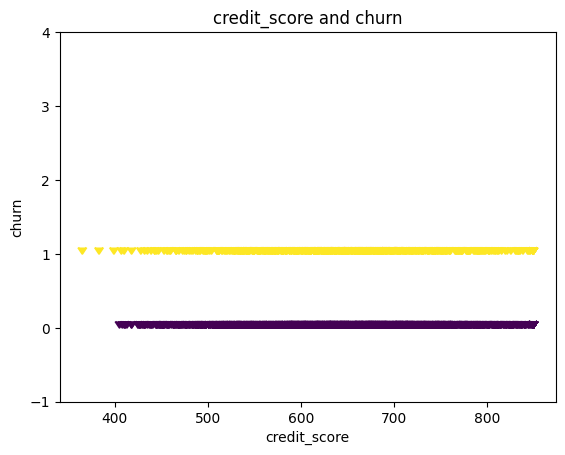

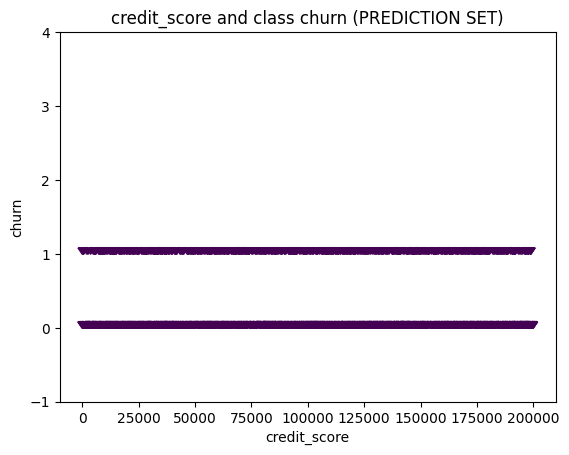

In [34]:
# Visualising the results
print(X_test.shape)
print(y_test.shape)

plt.scatter(X_test['credit_score'], y_test, c=y_test, marker=matplotlib.markers.CARETDOWN )
plt.title('credit_score and churn')
plt.xlabel('credit_score')
plt.ylabel('churn')

plt.ylim(-1,4)
plt.show()

# Visualising the results
plt.scatter(X_test['estimated_salary'], y_test, c=y_pred, marker=matplotlib.markers.CARETDOWN )
plt.title('credit_score and class churn (PREDICTION SET)')
plt.xlabel('credit_score')
plt.ylabel('churn')
plt.ylim(-1,4)
plt.show()